In [130]:
import matplotlib.pylab as plt
from astropy.io import fits
import numpy as np
import pandas as pd
import os
import scipy.interpolate
from scipy.interpolate import splev, splrep

In [131]:
star = 'HD72760'
Wave_Path = '/mnt_home/malikb/code/apf_wav.fits'
Flux_Path = '/mnt_home/malikb/code/rbcs.254.fits'

wl_file = fits.open(Wave_Path)
fl_file = fits.open(Flux_Path)
wl_image = wl_file[0].data
fl_image = fl_file[0].data

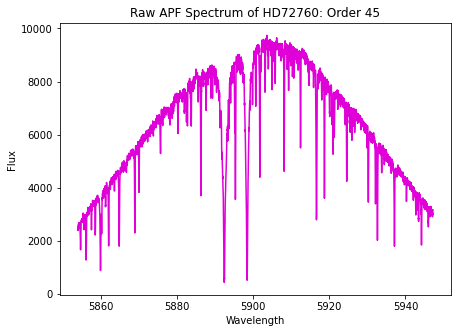

In [132]:
plt.rcParams["figure.figsize"] = (7,5)

order = 45
wave = (wl_image[order])
flux = (fl_image[order][:-1])

plt.plot(wave,flux, "#DF01D7")

plt.title('Raw APF Spectrum of ' + star + ': Order ' + str(order))
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

In [133]:
wl_image

array([[ 3729.77565156,  3729.79176627,  3729.80836931, ...,
         3789.57737194,  3789.58713844,  3789.59666078],
       [ 3760.09817644,  3760.11453532,  3760.13138252, ...,
         3820.38628368,  3820.39605018,  3820.40557252],
       [ 3790.91782387,  3790.93442692,  3790.95127413, ...,
         3851.7001312 ,  3851.71014186,  3851.7196642 ],
       ...,
       [ 9635.15578207,  9635.19777848,  9635.24075156, ...,
         9789.64594831,  9789.67134149,  9789.69575801],
       [ 9840.15884917,  9840.20182225,  9840.24577199, ...,
         9997.93549035,  9997.96088353,  9997.98627672],
       [10054.07493849, 10054.11791157, 10054.16283797, ...,
        10215.28162396, 10215.30799381, 10215.33338699]])

To find the wavelength the sodium-D lines exist in, index the order and the pixel number and find their corresponding wavelength value.

In [134]:
wl_image[45,1522]

5889.943593588502

In [135]:
wl_image[45,1795]

5895.918952315744

In [136]:
bias = np.median(wl_image[-30:])
print(bias)

7705.753417409038


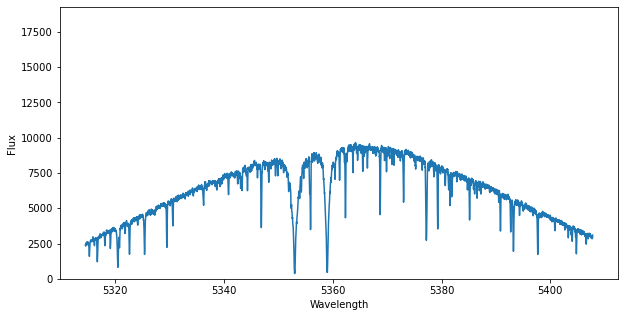

In [137]:
plt.figure(figsize=(10,5))
wave_adjusted = wave - (0.07*bias)
flux_adjusted = flux - (0.01*bias)
plt.plot(wave_adjusted, flux_adjusted)
ymax = np.median(flux_adjusted)*3
plt.ylim(0,ymax)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
interpolation = 'nearest'

In [138]:
np.median(flux)

6499.2104

In [139]:
wl_image

array([[ 3729.77565156,  3729.79176627,  3729.80836931, ...,
         3789.57737194,  3789.58713844,  3789.59666078],
       [ 3760.09817644,  3760.11453532,  3760.13138252, ...,
         3820.38628368,  3820.39605018,  3820.40557252],
       [ 3790.91782387,  3790.93442692,  3790.95127413, ...,
         3851.7001312 ,  3851.71014186,  3851.7196642 ],
       ...,
       [ 9635.15578207,  9635.19777848,  9635.24075156, ...,
         9789.64594831,  9789.67134149,  9789.69575801],
       [ 9840.15884917,  9840.20182225,  9840.24577199, ...,
         9997.93549035,  9997.96088353,  9997.98627672],
       [10054.07493849, 10054.11791157, 10054.16283797, ...,
        10215.28162396, 10215.30799381, 10215.33338699]])

In [140]:
wl_image[45,1523]

5889.966048803264

In [141]:
wl_image[45,1795]

5895.918952315744

Magnesium

In [142]:
wl_image[34,2206]

5183.614295675975

In [143]:
wl_image[34,1624]

5172.703736764768

In [144]:
wl_image[34,1350]

5167.34182218339

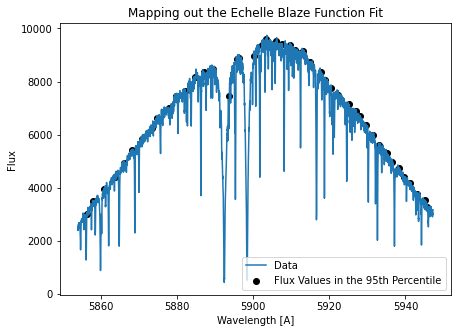

In [145]:
bin = 100

# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wave) - (bin)), step = bin):
    flux_values = []
    for j in np.arange(i, i + bin, step = 1):
        value = flux[j]
        flux_values = np.append(flux_values, value)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin = np.percentile(flux_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
    flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
    index_in_bin = flux_values.tolist().index(flux_in_bin)
    index = i + index_in_bin
    indices = np.append(indices, index)

# these lists will contain the wavlength and flux values at each index in 'indices'
wave_values = []
flux_values = []

for index in indices:
    ind = int(index)
    wave_values = np.append(wave_values, wave[ind])
    flux_values = np.append(flux_values, flux[ind])
    
plt.plot(wave, flux, label = 'Data')
plt.scatter(wave_values, flux_values, color = 'black', label = 'Flux Values in the 95th Percentile')
plt.title('Mapping out the Echelle Blaze Function Fit')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.show()

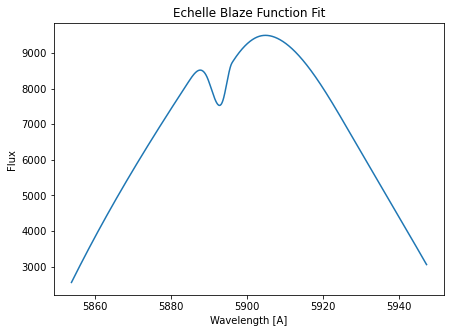

In [146]:
spl = splrep(wave_values, flux_values, s = 500000)
flux_fit = splev(wave, spl)
plt.plot(wave, flux_fit)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Echelle Blaze Function Fit')
plt.show()

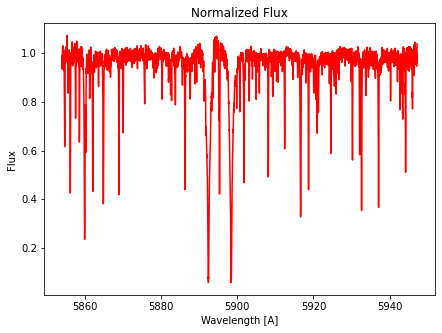

In [147]:
first_normalized_flux = flux / flux_fit
plt.plot(wave, first_normalized_flux, "r")
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Normalized Flux')
plt.show()

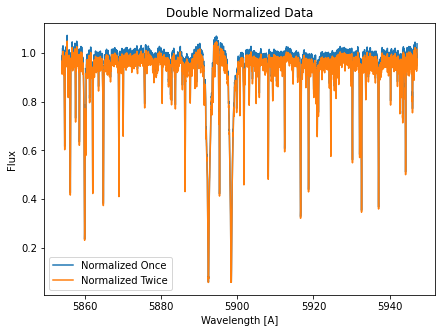

In [148]:
flux98 = np.percentile(first_normalized_flux, 98)
normalized_flux = first_normalized_flux / flux98

plt.plot(wave, first_normalized_flux, label = 'Normalized Once')
plt.plot(wave, normalized_flux, label = 'Normalized Twice')
plt.legend()
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Double Normalized Data')
plt.show()